# 4.8 Exercise 14

## a)

In [ ]:
import pandas as pd

In [ ]:
Auto = pd.read_csv('Auto.csv')
mpg01 = (Auto['mpg'] > Auto['mpg'].median()).astype(int)
Auto['mpg01'] = mpg01
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'], errors='coerce')

## b)

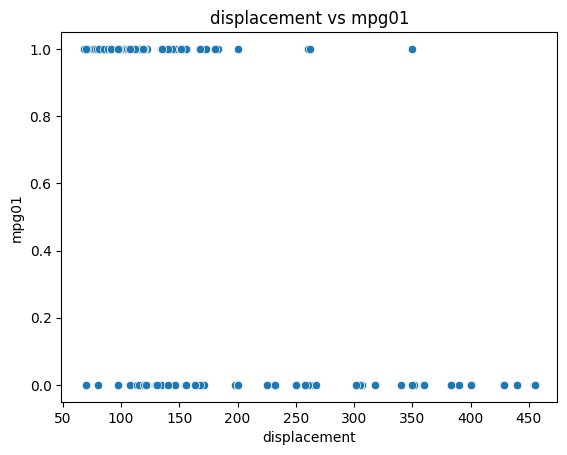

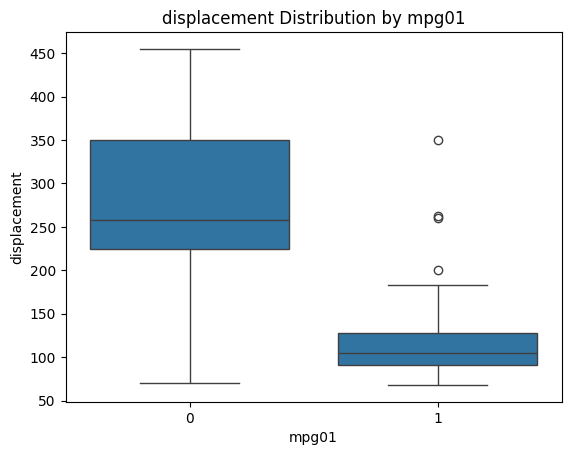

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=Auto['displacement'], y=Auto['mpg01'])
plt.title('displacement vs mpg01')
plt.show()

sns.boxplot(x='mpg01', y='displacement', data=Auto)
plt.title('displacement Distribution by mpg01')
plt.show()

Boxplot and Scatterplot comparing the distribution of displacement for cars with low and high gas mileage.

By observing the boxplot we can assume that displacement seems to be a very strong predictor of mpg01. Cars are much more likely to have low gas mileage if they are associated with high displacement values and vice versa. Some outliers might affect our result but they dont seem to be significant since they don't affect the overall distribution. This insight suggests that we should include displacement in our prediction model.

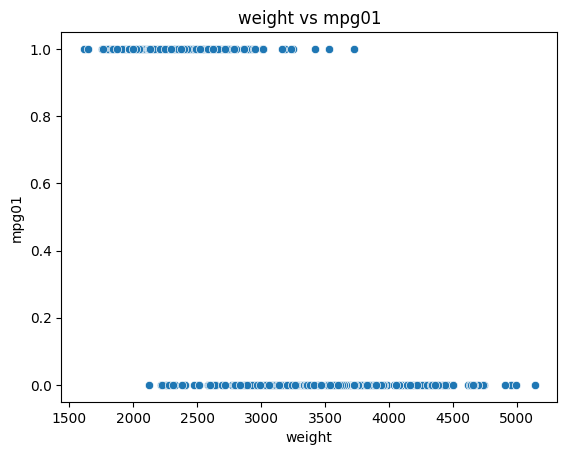

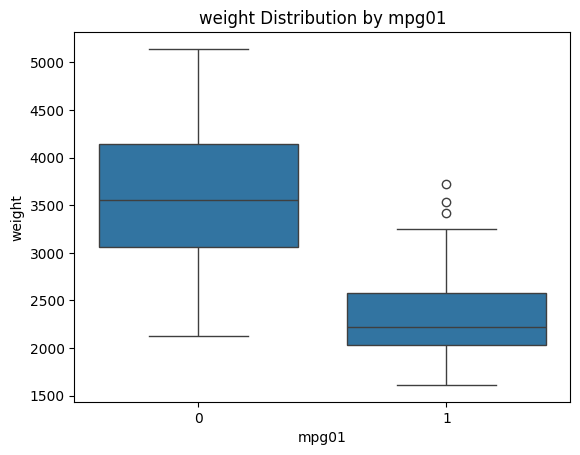

In [ ]:
sns.scatterplot(x=Auto['weight'], y=Auto['mpg01'])
plt.title('weight vs mpg01')
plt.show()

sns.boxplot(x='mpg01', y='weight', data=Auto)
plt.title('weight Distribution by mpg01')
plt.show()

Boxplot and Scatterplot comparing the distribution of weight for cars with low and high gas mileage.

Weight seems to be a very strong predictor of mpg01. Lighter cars are much more likely to have high gas mileage, while heavier cars tend to have low gas mileage. This insight suggests that including weight in our prediction model will likely improve its accuracy. We can mostly tell by the boxplot since there is a clear distinction between the two gas mileage categories.

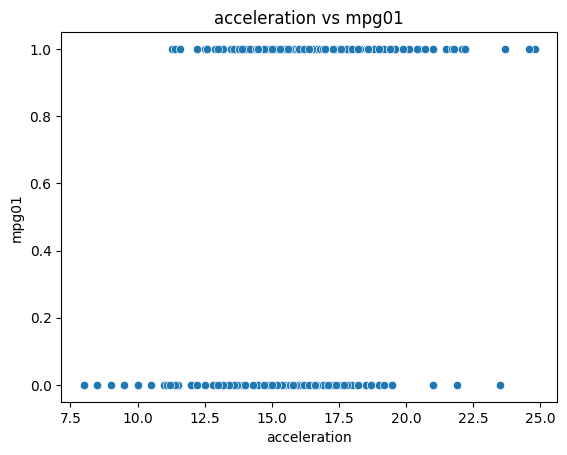

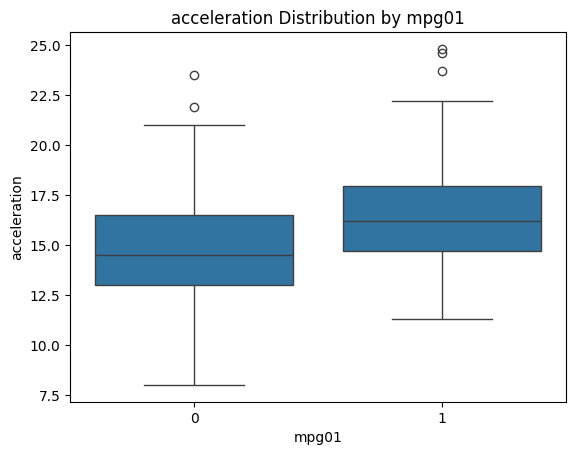

In [ ]:
sns.scatterplot(x=Auto['acceleration'], y=Auto['mpg01'])
plt.title('acceleration vs mpg01')
plt.show()

sns.boxplot(x='mpg01', y='acceleration', data=Auto)
plt.title('acceleration Distribution by mpg01')
plt.show()

Boxplot and Scatterplot comparing the distribution of acceleration for cars with low and high gas mileage.

While acceleration shows some correlation with mpg01, it might not be as strong of a predictor compared to variables like weight and horsepower. However, higher acceleration is generally associated with cars that have better gas mileage.

We can use acceleration as a predictor, but it may work better when combined with other features like weight and displacement.

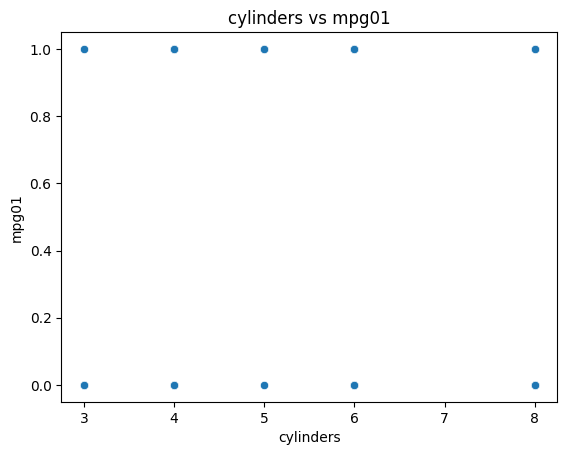

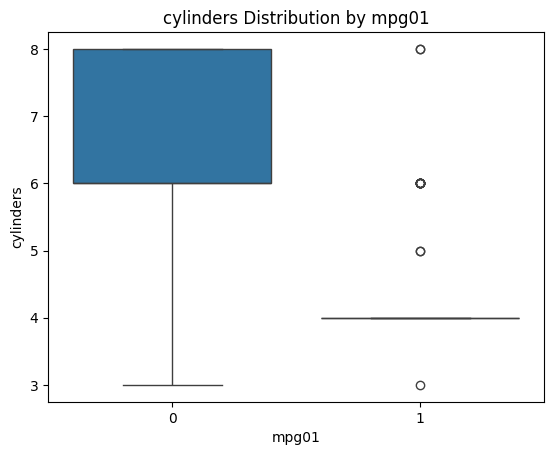

In [ ]:
sns.scatterplot(x=Auto['cylinders'], y=Auto['mpg01'])
plt.title('cylinders vs mpg01')
plt.show()

sns.boxplot(x='mpg01', y='cylinders', data=Auto)
plt.title('cylinders Distribution by mpg01')
plt.show()

Boxplot and Scatterplot comparing the distribution of cylinders for cars with low and high gas mileage.

Cylinders seems to be a very strong predictor of mpg01. Especially in determing cars with low mileage, since almost every singlie high cylinder car is associated with low mileage. This indicates that cylinders is going to be a strong predictor.

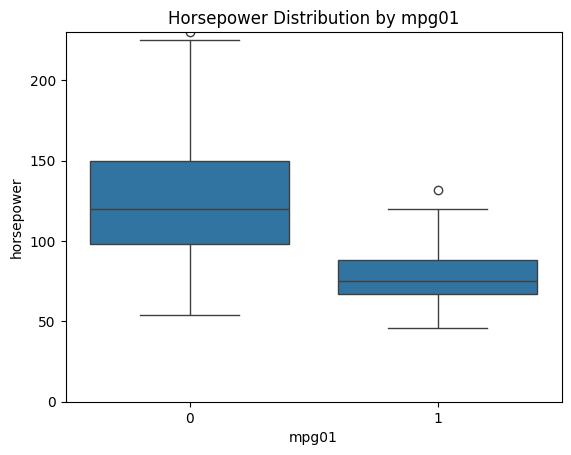

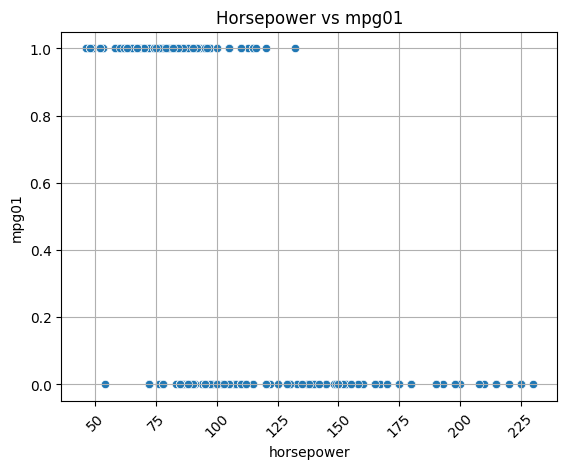

In [ ]:
# Adjust the plot to avoid cluttered labels and improve readability
sns.boxplot(x='mpg01', y='horsepower', data=Auto)
plt.title('Horsepower Distribution by mpg01')
plt.ylim(0, Auto['horsepower'].max())
plt.show()

sns.scatterplot(x=Auto['horsepower'], y=Auto['mpg01'])
plt.title('Horsepower vs mpg01')
plt.xticks(rotation=45)

plt.xlim(Auto['horsepower'].min() - 10, Auto['horsepower'].max() + 10)

# Add gridlines
plt.grid(True)
plt.show()

Boxplot and Scatterplot comparing the distribution of horsepower for cars with low and high gas mileage.

Horsepower also seems to be a very strong predictor of mpg01. As horsepower increases we can see that mileage decreases, hence including horsepower in our model will improve its accuracy.

## c)

In [ ]:
from sklearn.model_selection import train_test_split
X = Auto[['weight', 'displacement', 'horsepower', 'cylinders']]  # Add more features as needed
y = Auto['mpg01']

Auto.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

h)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)  # Test K from 1 to 20
test_accuracies = []

# Perform KNN for different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Fit the model
    y_pred = knn.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    test_accuracies.append(accuracy)  # Store accuracy

# Find the best K and its accuracy
best_k = k_values[np.argmax(test_accuracies)]
best_accuracy = max(test_accuracies)

# Display results
for k, accuracy in zip(k_values, test_accuracies):
    print(f'K={k}, Test Accuracy: {accuracy:.4f}')

print(f'\nBest K: {best_k}, with Test Accuracy: {best_accuracy:.4f}')

K=1, Test Accuracy: 0.8228
K=2, Test Accuracy: 0.8734
K=3, Test Accuracy: 0.8861
K=4, Test Accuracy: 0.8734
K=5, Test Accuracy: 0.8734
K=6, Test Accuracy: 0.8734
K=7, Test Accuracy: 0.8734
K=8, Test Accuracy: 0.8734
K=9, Test Accuracy: 0.8734
K=10, Test Accuracy: 0.8987
K=11, Test Accuracy: 0.8608
K=12, Test Accuracy: 0.8987
K=13, Test Accuracy: 0.8734
K=14, Test Accuracy: 0.8734
K=15, Test Accuracy: 0.8734
K=16, Test Accuracy: 0.8734
K=17, Test Accuracy: 0.8481
K=18, Test Accuracy: 0.8734
K=19, Test Accuracy: 0.8354
K=20, Test Accuracy: 0.8734

Best K: 10, with Test Accuracy: 0.8987


## PCA

Explained Variance Ratio without Scaling:
Principal Component 1: 0.9976
Principal Component 2: 0.0021
Principal Component 3: 0.0004
Principal Component 4: 0.0000
Principal Component 5: 0.0000

Explained Variance Ratio with Scaling:
Principal Component 1: 0.8144
Principal Component 2: 0.1388
Principal Component 3: 0.0267
Principal Component 4: 0.0129
Principal Component 5: 0.0073


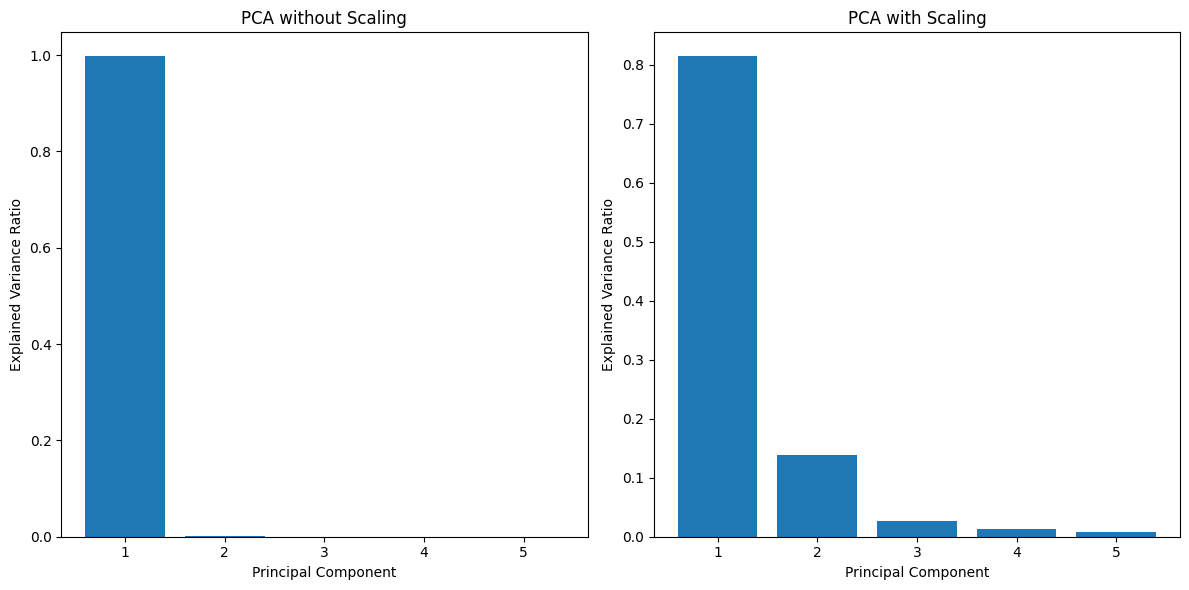

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
Auto.dropna(subset=features, inplace=True)

# Select the relevant features for PCA
X = Auto[features]

# Perform PCA without scaling
pca_no_scaling = PCA(n_components=len(features))
pca_no_scaling.fit(X)

# Explained variance ratio for PCA without scaling
explained_variance_no_scaling = pca_no_scaling.explained_variance_ratio_

# Rescale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA on scaled data
pca_with_scaling = PCA(n_components=len(features))
pca_with_scaling.fit(X_scaled)

# Explained variance ratio for PCA with scaling
explained_variance_with_scaling = pca_with_scaling.explained_variance_ratio_

# Display results
print("Explained Variance Ratio without Scaling:")
for i, var in enumerate(explained_variance_no_scaling):
    print(f"Principal Component {i + 1}: {var:.4f}")

print("\nExplained Variance Ratio with Scaling:")
for i, var in enumerate(explained_variance_with_scaling):
    print(f"Principal Component {i + 1}: {var:.4f}")

# Optional: Plotting the explained variance ratios
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(features) + 1), explained_variance_no_scaling)
plt.title('PCA without Scaling')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(features) + 1), explained_variance_with_scaling)
plt.title('PCA with Scaling')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()

Without Scaling:

Most of the variance is dominated by one principal component, making it less informative for distinguishing between other underlying patterns in the data.

With Scaling:

The variance is now more evenly distributed across the first few principal components, which indicates that scaling has allowed the PCA to capture more nuanced relationships between the features.

The stark difference between the two sets of explained variance ratios emphasizes the importance of feature scaling in PCA. Without scaling, the analysis may lead to a misleading interpretation of the data, as it can overly emphasize features with larger ranges.